# Make a character network from a text


In [17]:
import dhlab.nbtext as nb
import dhlab.module_update as mu
import dhlab.graph_networkx_louvain as gnl
from dhlab.nbtext import Corpus


In [15]:
mu.css()

In [16]:
import networkx as nx
import requests
import pandas as pd

def check_navn(navn, limit=2, remove='Ja Nei Nå Dem De Deres Unnskyld Ikke Ah Hmm'.split()):
    """Removes all items in navn with frequency below limit and words in all case as well as all words in list 'remove'"""
    r = {x:navn[x] for x in navn if navn[x] > limit and x.upper() != x and not x in remove}
    return r

def check_edges(G, weight=1):    
    return nx.Graph([edge for edge in G.edges(data=True) if edge[2]['weight'] >= weight])

def freq(urn, words):
    params = {'urn':urn, 'words':words}
    r = requests.post("https://api.nb.no/ngram/freq", json=params)
    return dict(r.json())

def book_count(urns):
    params = {'urns':urns}
    r = requests.post("https://api.nb.no/ngram/book_count", json=params)
    return dict(r.json())

# Select a list of books

Add metadata in order to select a book.


In [3]:
bøker = nb.get_urn({'title':'krig%', 'author':"tols%", 'trans':'', 'year':1800, 'next':250, 'limit':130})

for b in bøker:
    print(book_count([b[0]]), b)

{2007111900105: 163601} [2007111900105, 'Tolstoj, L.N.', 'Krig og fred', 1993]
{2007032801091: 91485} [2007032801091, 'Tolstoj, L.N.', 'Krig og fred', 1962]
{2015110507062: 88222} [2015110507062, 'Tolstoj, L.N.', 'Krig og fred', 1928]
{2007111904099: 133554} [2007111904099, 'Tolstoj, L.N.', 'Krig og fred', 1993]
{2008042300036: 141243} [2008042300036, 'Tolstoj, L.N.', 'Krig og fred', 1951]
{2014100308012: 90432} [2014100308012, 'Tolstoj, L.N.', 'Krig og fred', 1929]
{2007050801009: 141332} [2007050801009, 'Tolstoj, L.N.', 'Krig og fred', 1968]
{2011063022003: 173184} [2011063022003, 'Tolstoj, L.N.', 'Krig og fred', 1967]
{2012011008041: 127143} [2012011008041, 'Tolstoj, L.N.', 'Krig og fred', 1951]
{2011081020006: 163906} [2011081020006, 'Tolstoj, L.N.', 'Krig og fred', 1968]
{2008101004071: 125257} [2008101004071, 'Tolstoj, L.N.', 'Krig og fred', 2000]
{2008102204034: 133546} [2008102204034, 'Tolstoj, L.N.', 'Krig og fred', 2000]
{2011063022004: 124729} [2011063022004, 'Tolstoj, L.N.'

In [4]:
book_count([b[0] for b in bøker])

{2007111900105: 163601,
 2007032801091: 91485,
 2015110507062: 88222,
 2007111904099: 133554,
 2008042300036: 141243,
 2014100308012: 90432,
 2007050801009: 141332,
 2011063022003: 173184,
 2012011008041: 127143,
 2011081020006: 163906,
 2008101004071: 125257,
 2008102204034: 133546,
 2011063022004: 124729,
 2008102200095: 163366,
 2015091006105: 126615,
 2007050800051: 99532,
 2011061508082: 294884,
 2008110400150: 157120,
 2007041101090: 98936,
 2014101408145: 100031,
 2008011501085: 127646,
 2011063023001: 163241,
 2011061508081: 324509,
 2011063022002: 179369,
 2007041001053: 91212,
 2008042400005: 122127,
 2007051400011: 131527,
 2011030308018: 168239,
 2015091406029: 98414,
 2007032601072: 102980}

### Assign a select book to variable 'book'

In [5]:
book =[2011061508081, 'Tolstoj, L.N.', 'Krig og fred', 2008]

Compute the candidates for characters - anything starting with a capital letter that could be a person name or place name. Print the topmost elements.

In [6]:
book_names_raw = nb.navn(book)
print('Number of objects === ', len(list(book_names_raw)), '\nSome examples ======= ', list(book_names_raw)[:20])

Number of objects ===  693 
Some examples =======  ['Adam', 'Adieu', 'Ah', 'Akhrosimova', 'Akk', 'Aleksander', 'Aleksanders', 'Aleksejevitsj', 'Aleksejevitsjs', 'Alfons', 'Allez', 'Allmektige', 'Allons', 'Alpatytsj', 'Amélie', 'Anarole', 'Anatole', 'Anatoles', 'Andre', 'Andrej']


### Edit names, remove some words

Rerun from here and change parameters

In [7]:
book_names = check_navn(book_names_raw, 20)
print([x for x in book_names])

['Aleksander', 'Anatole', 'Andre', 'Andrej', 'Andrejevitsj', 'Andrejitsj', 'Andrejs', 'André', 'Anna', 'Austerlitz', 'Bagration', 'Balaga', 'Berg', 'Bezukhov', 'Bilibin', 'Bolkonskij', 'Bonaparte', 'Boris', 'Bourienne', 'Cest', 'Danilo', 'Denisov', 'Denisovs', 'Dmitrijevna', 'Dolgorukov', 'Dolokhov', 'Dolokhovs', 'Er', 'Gory', 'Gud', 'Guds', 'Har', 'Helene', 'Hippolyte', 'Hvem', 'Hvordan', 'Ilja', 'Jo', 'Julie', 'Kjære', 'Kom', 'Kuragin', 'Kutuzov', 'Kutuzovs', 'Liza', 'Lysyje', 'Majestet', 'Mamma', 'Mana', 'Maria', 'Marja', 'Mikhail', 'Mikhajlovna', 'Mile', 'Mon', 'Moskva', 'Napoleon', 'Natasja', 'Natasjas', 'Nesvitskij', 'Nikolaj', 'Nåvel', 'Otradnoje', 'Pavlovna', 'Petersburg', 'Petja', 'Pierre', 'Pierres', 'Rostov', 'Rostovs', 'Russland', 'Se', 'Sjinsjin', 'Sonja', 'Speranskij', 'Teljanin', 'Tikhon', 'Tusjin', 'Vasilij', 'Vasilijs', 'Vera', 'Vous', 'Vær', 'Weyrother', 'Wien', 'Zjerkov']


## Create the network

In [8]:
network_raw = nb.make_network(book, book_names)

Remove edges with a weight (usually number of connections) less than weight.

In [9]:
network = check_edges(network_raw, weight=3)

In [10]:
nb.central_betweenness_characters(network)

[('Andrej', 0.1444974684589169),
 ('Pierre', 0.09718282112350321),
 ('Rostov', 0.05280597625990593),
 ('Natasja', 0.04969941915341778),
 ('Boris', 0.04646826162853766),
 ('Nikolaj', 0.046351338035806496),
 ('Moskva', 0.029516539878174312),
 ('Maria', 0.028720169315572735),
 ('Anatole', 0.02591445592773702),
 ('Sonja', 0.022745916953137137)]

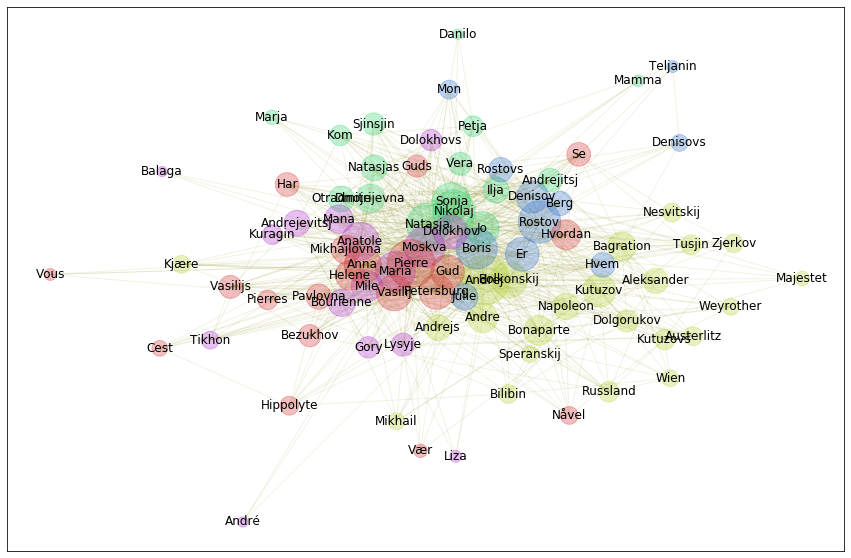

In [19]:
gnl.show_graph(network, fontsize=12)

In [20]:
gnl.show_communities(network)

Andrej-Bolkonskij :  Andrej, Bolkonskij, Kutuzov, Andre, Bonaparte, Bagration, Napoleon, Andrejs, Aleksander, Dolgorukov, Russland, Kutuzovs, Tusjin, Nesvitskij, Bilibin, Zjerkov, Austerlitz, Kjære, Weyrother, Mikhail, Speranskij, Wien, Majestet

Natasja-Nikolaj :  Natasja, Nikolaj, Sonja, Jo, Dmitrijevna, Otradnoje, Natasjas, Ilja, Andrejitsj, Vera, Sjinsjin, Petja, Kom, Marja, Mamma, Danilo

Rostov-Boris :  Rostov, Boris, Er, Denisov, Julie, Rostovs, Berg, Hvem, Mon, Denisovs, Teljanin

Moskva-Maria :  Moskva, Maria, Anatole, Dolokhov, Mile, Mana, Bourienne, Andrejevitsj, Lysyje, Dolokhovs, Gory, Kuragin, Tikhon, Liza, André, Balaga

Pierre-Anna :  Pierre, Anna, Vasilij, Petersburg, Gud, Hvordan, Helene, Mikhajlovna, Pavlovna, Har, Se, Vasilijs, Bezukhov, Guds, Pierres, Hippolyte, Nåvel, Cest, Vær, Vous



In [163]:
nb.get_urnkonk('Denisov',{'urns':[book[0]], 'before':12, "after":12,"size":20})

"Krig og fred, Tolstoj, L.N., 2008",", var innkvartert i den tyske landsbyen Salzeneck . Eskadronsjefen , nttmester",Denisov,", som var kjent i hele kavaleridivisjonen under navnet Vaska Denisov ,"
"Krig og fred, Tolstoj, L.N., 2008","nttmester Denisov , som var kjent i hele kavaleridivisjonen under navnet Vaska",Denisov,", hadde fått seg anvist det beste kvarteret i hele landsbyen ."
"Krig og fred, Tolstoj, L.N., 2008","Macks nederlag , gikk livet fortsatt sin vante gang ved eskadronen .",Denisov,", som hadde vært ute og spilt kort hele natten , var"
"Krig og fred, Tolstoj, L.N., 2008","tyskeren til fjøset og Rostov inn i stuen , hvor han og",Denisov,bodde .
"Krig og fred, Tolstoj, L.N., 2008",Rostov kikket ut av vinduet og fikk øye på,Denisov,". Denisov var en liten mann med rødt ansikt , gnistrende svarte"
"Krig og fred, Tolstoj, L.N., 2008",Rostov kikket ut av vinduet og fikk øye på Denisov .,Denisov,"var en liten mann med rødt ansikt , gnistrende svarte øyne ,"
"Krig og fred, Tolstoj, L.N., 2008","- Å , er du alt oppe ? sa",Denisov,da han kom inn . - Jaså ! Og jeg har blakket
"Krig og fred, Tolstoj, L.N., 2008",ropte,Denisov,. - Snakk om å sitte i utur ! ... Så tort
"Krig og fred, Tolstoj, L.N., 2008",None,Denisov,"rynket pannen , smilte og viste sine korte , sterke tenner og"
"Krig og fred, Tolstoj, L.N., 2008",None,Denisov,fikk et enda morskere uttrykk i ansiktet .
"Krig og fred, Tolstoj, L.N., 2008",Ute i forstuen sått,Denisov,sammenkrøpet på dørstokken med pipen i munnen og hørte på vaktmesterens rapport


In [164]:
node_freq = freq(book[0], list(network.nodes()))

In [148]:
#tot = sum(node_freq.values())
for e in node_freq:
    network.node[e]['weight'] = node_freq[e]#/tot

In [149]:
network.nodes(data=True)

NodeDataView({'Aleksander': {'weight': 36}, 'Andrej': {'weight': 734}, 'Andrejitsj': {'weight': 38}, 'Bagration': {'weight': 115}, 'Bolkonskij': {'weight': 108}, 'Bonaparte': {'weight': 81}, 'Boris': {'weight': 266}, 'Denisov': {'weight': 219}, 'Dolgorukov': {'weight': 39}, 'Ilja': {'weight': 42}, 'Kutuzov': {'weight': 169}, 'Moskva': {'weight': 142}, 'Napoleon': {'weight': 84}, 'Nikolaj': {'weight': 327}, 'Petersburg': {'weight': 109}, 'Pierre': {'weight': 895}, 'Rostov': {'weight': 561}, 'Russland': {'weight': 35}, 'Vasilij': {'weight': 164}, 'Anatole': {'weight': 209}, 'Andrejevitsj': {'weight': 26}, 'Andrejs': {'weight': 38}, 'André': {'weight': 23}, 'Anna': {'weight': 255}, 'Austerlitz': {'weight': 25}, 'Berg': {'weight': 74}, 'Bilibin': {'weight': 47}, 'Bourienne': {'weight': 79}, 'Cest': {'weight': 32}, 'Dmitrijevna': {'weight': 81}, 'Dolokhov': {'weight': 225}, 'Gory': {'weight': 27}, 'Gud': {'weight': 132}, 'Guds': {'weight': 39}, 'Helene': {'weight': 109}, 'Hippolyte': {'weig

In [147]:
nb.central_characters(network, n=len(network))

[('Andrej', 0.8507462686567164),
 ('Pierre', 0.7611940298507462),
 ('Rostov', 0.6268656716417911),
 ('Moskva', 0.6119402985074627),
 ('Nikolaj', 0.6119402985074627),
 ('Natasja', 0.5970149253731343),
 ('Boris', 0.5671641791044776),
 ('Maria', 0.5522388059701493),
 ('Bolkonskij', 0.47761194029850745),
 ('Anna', 0.47761194029850745),
 ('Anatole', 0.4626865671641791),
 ('Sonja', 0.4626865671641791),
 ('Petersburg', 0.44776119402985076),
 ('Vasilij', 0.417910447761194),
 ('Gud', 0.40298507462686567),
 ('Dolokhov', 0.3880597014925373),
 ('Mile', 0.34328358208955223),
 ('Bonaparte', 0.3283582089552239),
 ('Kutuzov', 0.3283582089552239),
 ('Helene', 0.31343283582089554),
 ('Napoleon', 0.29850746268656714),
 ('Dmitrijevna', 0.29850746268656714),
 ('Mikhajlovna', 0.29850746268656714),
 ('Bagration', 0.2835820895522388),
 ('Denisov', 0.2835820895522388),
 ('Ilja', 0.2835820895522388),
 ('Aleksander', 0.26865671641791045),
 ('Bourienne', 0.26865671641791045),
 ('Mana', 0.26865671641791045),
 ('An